
Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [148]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [149]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [150]:
!unzip gdrive/MyDrive/CNN_assignment

Archive:  gdrive/MyDrive/CNN_assignment.zip
replace Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [151]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [152]:
#Checking data in the drive 
!ls

 gdrive       'Skin cancer ISIC The International Skin Imaging Collaboration'
 sample_data


In [153]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [154]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [155]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 17579 files belonging to 9 classes.
Using 14064 files for training.


In [156]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 17579 files belonging to 9 classes.
Using 3515 files for validation.


In [157]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

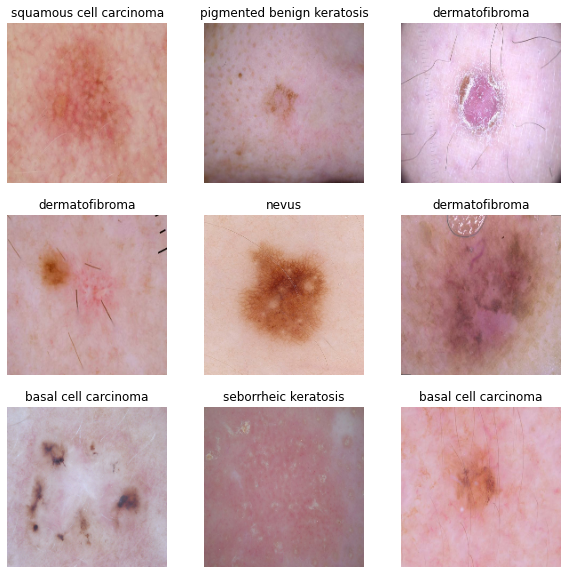

In [158]:
###use training or validation data to visualize

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [159]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [160]:
### Your code goes here
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [161]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [162]:
# View the summary of all layers
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_10 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 22, 22, 64)      

### Train the model

In [163]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
440/440 [==============================] - 64s 39ms/step - loss: 1.9758 - accuracy: 0.2513 - val_loss: 1.2956 - val_accuracy: 0.5195
Epoch 2/20
440/440 [==============================] - 6s 14ms/step - loss: 1.0676 - accuracy: 0.6082 - val_loss: 0.8222 - val_accuracy: 0.6979
Epoch 3/20
440/440 [==============================] - 6s 14ms/step - loss: 0.6164 - accuracy: 0.7859 - val_loss: 0.4799 - val_accuracy: 0.8341
Epoch 4/20
440/440 [==============================] - 6s 14ms/step - loss: 0.3648 - accuracy: 0.8775 - val_loss: 0.3783 - val_accuracy: 0.8799
Epoch 5/20
440/440 [==============================] - 6s 14ms/step - loss: 0.2802 - accuracy: 0.8995 - val_loss: 0.3496 - val_accuracy: 0.8859
Epoch 6/20
440/440 [==============================] - 6s 14ms/step - loss: 0.2001 - accuracy: 0.9266 - val_loss: 0.3617 - val_accuracy: 0.8922
Epoch 7/20
440/440 [==============================] - 6s 14ms/step - loss: 0.1755 - accuracy: 0.9392 - val_loss: 0.3246 - val_accuracy: 0.894

### Visualizing training results

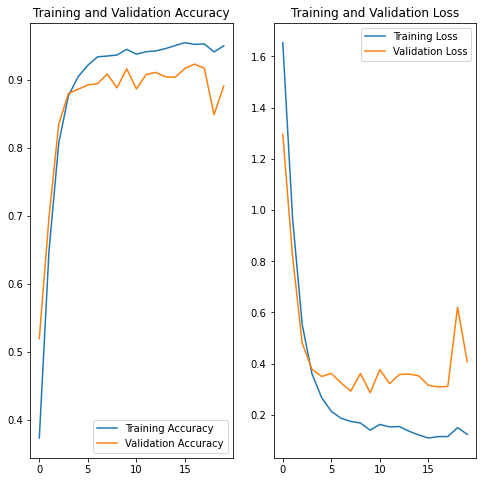

In [164]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit


As we can see from the plots, training accuracy and validation accuracy are off by a decent margin and the model has achieved considerably lesser accuracy on the validation set compared to a very good accuracy on the training set and there seems to be a huge difference between validation loss and training loss, as well, which is an evidence of **overfitting**.

Let's try to increase the overall performance of the model by using Data Augmentation.





#### Data augmentation
Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

You will implement data augmentation using the layers from tf.keras.layers.experimental.preprocessing. These can be included inside your model like other layers, and run on the GPU.

### Write your findings here

In [165]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

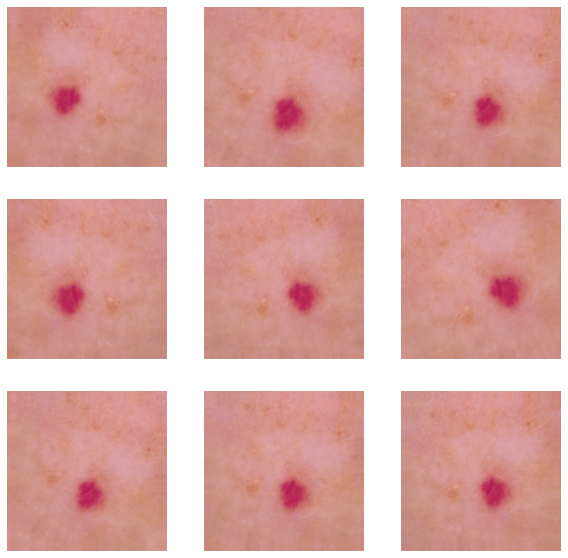

In [166]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [167]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compiling the model

In [168]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [169]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
440/440 [==============================] - 8s 17ms/step - loss: 1.8631 - accuracy: 0.2670 - val_loss: 1.4151 - val_accuracy: 0.4808
Epoch 2/20
440/440 [==============================] - 7s 17ms/step - loss: 1.3755 - accuracy: 0.4815 - val_loss: 1.1967 - val_accuracy: 0.5477
Epoch 3/20
440/440 [==============================] - 7s 17ms/step - loss: 1.2360 - accuracy: 0.5278 - val_loss: 1.1189 - val_accuracy: 0.5912
Epoch 4/20
440/440 [==============================] - 7s 17ms/step - loss: 1.1476 - accuracy: 0.5719 - val_loss: 1.0650 - val_accuracy: 0.6193
Epoch 5/20
440/440 [==============================] - 7s 17ms/step - loss: 1.0551 - accuracy: 0.6051 - val_loss: 0.9046 - val_accuracy: 0.6782
Epoch 6/20
440/440 [==============================] - 7s 17ms/step - loss: 0.9601 - accuracy: 0.6427 - val_loss: 0.9157 - val_accuracy: 0.6575
Epoch 7/20
440/440 [==============================] - 7s 17ms/step - loss: 0.9056 - accuracy: 0.6630 - val_loss: 0.8261 - val_accuracy: 0.6976

### Visualizing the results

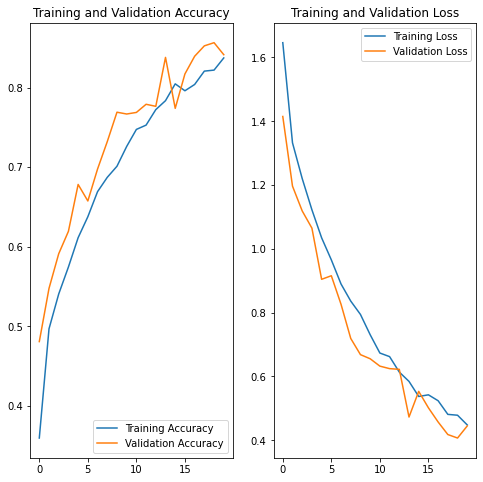

In [170]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

As we can see from the plots, training accuracy and validation accuracy are almost the same and a similar trend is observed between validation loss and training loss which shows that the model has improved and seems to be a good fit.

Let's see if there is any classs imbalance, so that we can further improve the overall performance of the model.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [171]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [172]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,nevus
1,Skin cancer ISIC The International Skin Imagin...,nevus
2,Skin cancer ISIC The International Skin Imagin...,nevus
3,Skin cancer ISIC The International Skin Imagin...,nevus
4,Skin cancer ISIC The International Skin Imagin...,nevus
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,seborrheic keratosis
2235,Skin cancer ISIC The International Skin Imagin...,seborrheic keratosis
2236,Skin cancer ISIC The International Skin Imagin...,seborrheic keratosis
2237,Skin cancer ISIC The International Skin Imagin...,seborrheic keratosis


Class=4, n=357 (15.945%)
Class=1, n=376 (16.793%)
Class=3, n=438 (19.562%)
Class=8, n=139 (6.208%)
Class=0, n=114 (5.092%)
Class=7, n=181 (8.084%)
Class=2, n=95 (4.243%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)


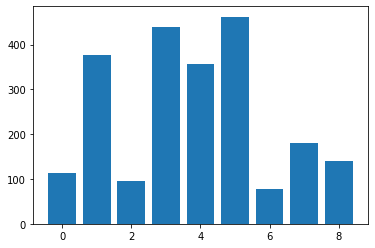

In [173]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
Class 6 (3.439%)
#### - Which classes dominate the data in terms proportionate number of samples?
Class 5 (20.634%)


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [174]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [175]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE795A36BD0>:   0%|          | 1/500 [00:00<01:19,  6.25 Samples/s]

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE79755CE50>: 100%|██████████| 500/500 [00:15<00:00, 32.44 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE7EE769810>: 100%|██████████| 500/500 [00:15<00:00, 32.97 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE7EE701390>: 100%|██████████| 500/500 [00:15<00:00, 31.89 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FE7975F2A10>:   0%|          | 1/500 [00:00<01:32,  5.39 Samples/s]                  

Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FE7983B9210>: 100%|██████████| 500/500 [01:32<00:00,  5.40 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FE7975E6210>: 100%|██████████| 500/500 [01:15<00:00,  6.65 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE795AF4250>: 100%|██████████| 500/500 [00:15<00:00, 31.80 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FE7952E44D0>: 100%|██████████| 500/500 [00:39<00:00, 12.70 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE7EFA74B50>:   0%|          | 1/500 [00:00<00:50,  9.95 Samples/s]

Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE796386150>: 100%|██████████| 500/500 [00:15<00:00, 32.88 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE7EFD9C990>:   0%|          | 1/500 [00:00<00:54,  9.17 Samples/s]

Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE7EA8BAF50>: 100%|██████████| 500/500 [00:15<00:00, 31.39 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [176]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

19840


### Lets see the distribution of augmented data after adding new images to the original training data.

In [177]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000490.jpg_4d6fa3a7-ef75-4ac0-b2d8-14c6f946c8aa.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0024948.jpg_b7378b87-9914-43a7-b632-2cf1dc690d16.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000333.jpg_6b86c3db-37a7-40d8-aaf6-1289c1b4a0aa.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000084.jpg_5a186d78-7fdd-4ede-894a-c9dc51451f49.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000093.jpg_9ebdf078-acb5-46d3-bc46-766dc34c5728.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000068.jpg_f4c4fd08-c08e-494a-b461-30c375151eaa.jpg',
 'Skin cancer ISIC The International Skin Imaging Co

In [178]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',


In [179]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [180]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [181]:
new_df['Label'].value_counts()

basal cell carcinoma          2876
melanoma                      2778
actinic keratosis             2614
dermatofibroma                2595
pigmented benign keratosis    2462
nevus                         2357
squamous cell carcinoma       2181
vascular lesion               2139
seborrheic keratosis          2077
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [182]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [183]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 22079 files belonging to 9 classes.
Using 17664 files for training.


#### **Todo:** Create a validation dataset

In [184]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 22079 files belonging to 9 classes.
Using 4415 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [185]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [186]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [187]:
## Train the model for ~30 epochs for the rectified class imbalance data
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
552/552 [==============================] - 81s 41ms/step - loss: 1.8117 - accuracy: 0.3038 - val_loss: 1.1008 - val_accuracy: 0.6097
Epoch 2/30
552/552 [==============================] - 8s 15ms/step - loss: 1.0020 - accuracy: 0.6417 - val_loss: 0.7615 - val_accuracy: 0.7268
Epoch 3/30
552/552 [==============================] - 8s 14ms/step - loss: 0.6216 - accuracy: 0.7776 - val_loss: 0.4761 - val_accuracy: 0.8435
Epoch 4/30
552/552 [==============================] - 8s 14ms/step - loss: 0.4063 - accuracy: 0.8538 - val_loss: 0.3483 - val_accuracy: 0.8856
Epoch 5/30
552/552 [==============================] - 8s 14ms/step - loss: 0.2984 - accuracy: 0.8931 - val_loss: 0.3714 - val_accuracy: 0.8550
Epoch 6/30
552/552 [==============================] - 8s 14ms/step - loss: 0.2506 - accuracy: 0.9080 - val_loss: 0.2902 - val_accuracy: 0.9069
Epoch 7/30
552/552 [==============================] - 8s 14ms/step - loss: 0.2276 - accuracy: 0.9162 - val_loss: 0.2969 - val_accuracy: 0.906

#### **Todo:**  Visualize the model results

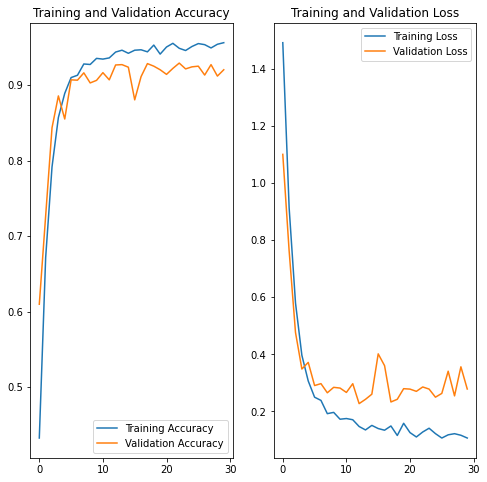

In [188]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



As we can see from the plots, after removing the class imbalance the training accuracy has increased considerably and validation accuracy is also high and comparable to training accuracy and thus this a good model and could be used for prediction.